# Estimating a statistical model and drawing a diagnostic plot

In [1]:
from patsy import dmatrices
import pandas
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

## Example, statsmodel

### Ordinary Least Squares
OLS measures the accuracy of a linear regression model.The method "Least Squares" mean we are trying to fit a regression line that would minimize the square of distance from the regression line.

OLS is built on assumptions which, if held, indicate the model may be the correct lens through which to interpret our data. If the assumptions don't hold, our model's conclusions lose their validity.

Take extra effort to choose the right model to avoid over-fitting. 

Here are the OLS assumptions:

    Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
    
    No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
    
    Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
    
    Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
    
    No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

#### Data from A.-M. Guerry, "Essay on the Moral Statistics of France" 

The Guerry data frame comprises a collection of 'moral variables' on the 86 departments (administrative regions) of France around 1830. 

We want to know whether literacy rates in the 86 French administrative regions are associated with per capita wagers (bets) on the Royal Lottery in the 1820s. We need to control for the level of wealth in each administrative regions, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects. The model is estimated using ordinary least squares regression (OLS).

Data dictionary: https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Guerry.html

JFYI, Royal Lottery: The French Royal Lottery was founded in 1776 under Louis XVI. The king and his ministers saw the lottery as a way to raise revenue while avoiding the politically contentious debates with the Parlement of Paris over taxation. 

In [4]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [5]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [6]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


There is one missing observation in the Region column. We remove the record using a DataFrame method provided by pandas:

In [7]:
df = df.dropna()

In [9]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

patsy.dmatrix(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')

    Construct a single design matrix given a formula_like and data.

Parameters:

    formula_like – An object that can be used to construct a design matrix. See below.
    data – A dict-like object that can be used to look up variables referenced in formula_like.
    eval_env – Either a EvalEnvironment which will be used to look up any variables referenced in formula_like that cannot be found in data, or else a depth represented as an integer which will be passed to EvalEnvironment.capture(). eval_env=0 means to use the context of the function calling dmatrix() for lookups. If calling this function from a library, you probably want eval_env=1, which means that variables should be resolved in your caller’s namespace.
    
    NA_action – What to do with rows that contain missing values. You can "drop" them, "raise" an error, or for customization, pass an NAAction object. See NAAction for details on what values count as ‘missing’ (and how to alter this).
    
    return_type – Either "matrix" or "dataframe"
    
review more: https://patsy.readthedocs.io/en/latest/API-reference.html

- Literacy: percent Read & Write: Percent of military conscripts who can read and write
- Wealth: Per capita tax on personal property. A ranked index based on taxes on personal and movable property per inhabitant.
- Region: Region of France ('N'='North', 'S'='South', 'E'='East', 'W'='West', 'C'='Central')
- Lottery: Per capita wager on Royal Lottery. Ranked ratio of the proceeds bet on the royal lottery to population— Average for the years 1822-1826

In [10]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [11]:
 X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


Notice that dmatrices has
    split the categorical Region variable into a set of indicator variables.
    added a constant to the exogenous regressors matrix.
    returned pandas DataFrames instead of simple numpy arrays. This is useful because DataFrames allow statsmodels to carry-over meta-data (e.g. variable names) when reporting results.


### Model fit and summary

Fitting a model in statsmodels typically involves 3 easy steps:

    Use the model class to describe the model
    Fit the model using a class method
    Inspect the results using a summary method

For OLS, this is achieved by:

In [14]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print (res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           1.07e-05
Time:                        16:06:59   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

Adj. R-squared indicates that 28% of lottery can be explained by our predictor variables; regions, literacy, and wealth. 

The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant.

The standard error measures the accuracy of our predictor variables' coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard errors range between 9.7 and 0.1. The lower the std error, the higher the accuracy.

The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that wealth's coefficient will be within our confidence interval, [0.247, 0.656].

In [15]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

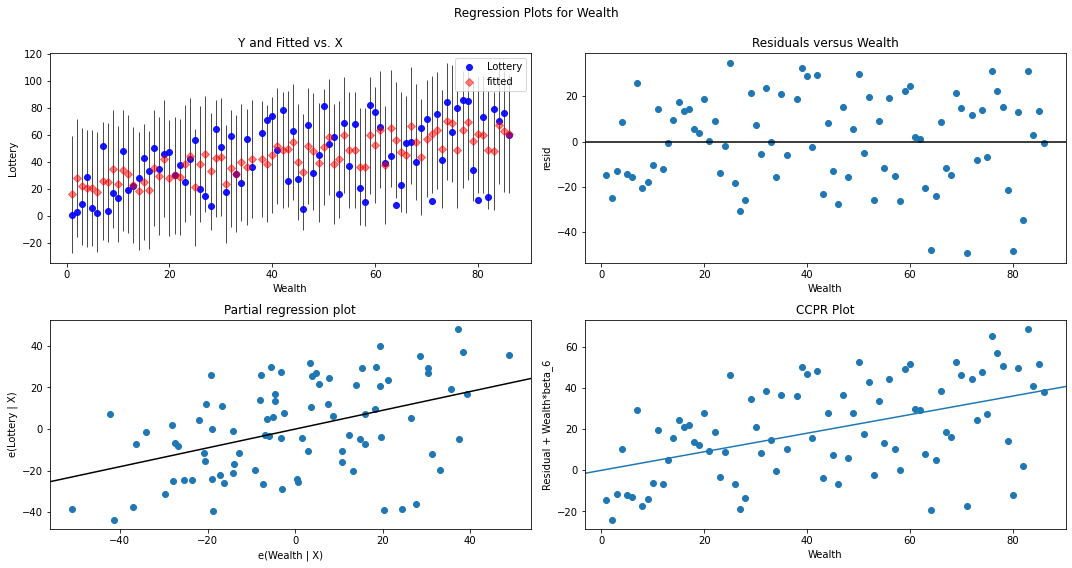

In [16]:
# This produces our four regression plots for Wealth

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "Wealth", fig=fig)


1. The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. We'd look for a positive or negative correlation, i.e., when one variable increases the other increases or decreases, respectively.

2. The “Residuals versus Wealth” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

3. The “Partial regression plot” shows the relationship between lottery and wealth, taking in to account the impact of adding other independent variables on our existing wealth coefficient. 

4. The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing wealth coefficient. 

Type dir(res) for a full list of attributes.

### Diagnostics and specification tests

statsmodels allows you to conduct a range of useful regression diagnostics and specification tests. For instance, apply the Rainbow test for linearity (the null hypothesis is that the relationship is properly modelled as linear):

In [17]:
sm.stats.linear_rainbow(res)

(0.8472339976156913, 0.6997965543621643)

First number is an F-statistic and that the second is the p-value.

doc: https://www.statsmodels.org/dev/diagnostic.html

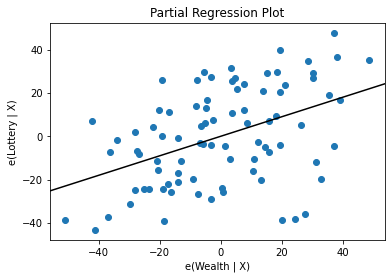

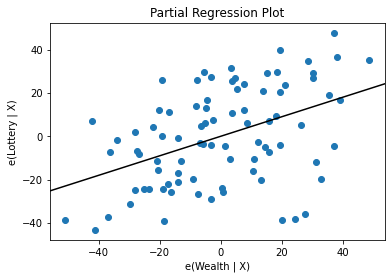

In [18]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                                 data=df, obs_labels=False)


statsmodel library documentation: 
    https://tedboy.github.io/statsmodels_doc/doc_basic/gettingstarted.html

## R like graphs!

https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
    """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)

    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

C:\Users\meltra02\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\meltra02\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\meltra02\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


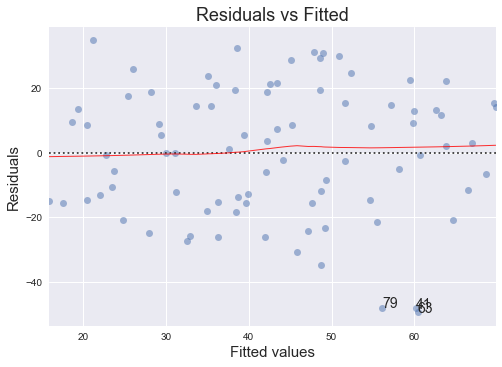

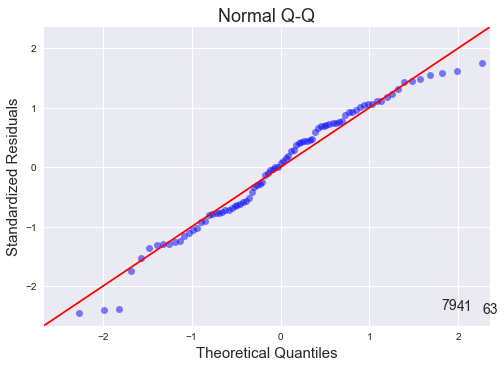

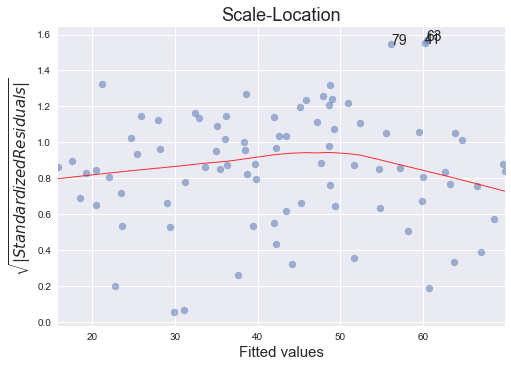

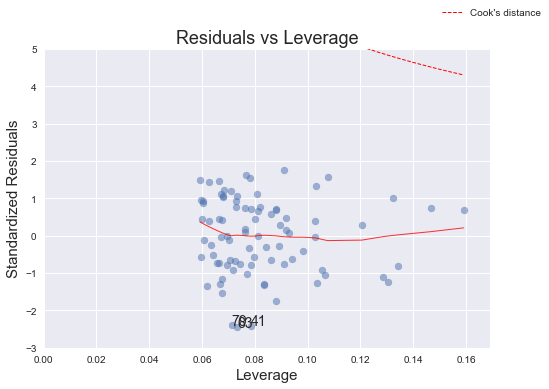

In [20]:
diagnostic_plots(X, y)